/tmp/ipykernel_34314/3137976817.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


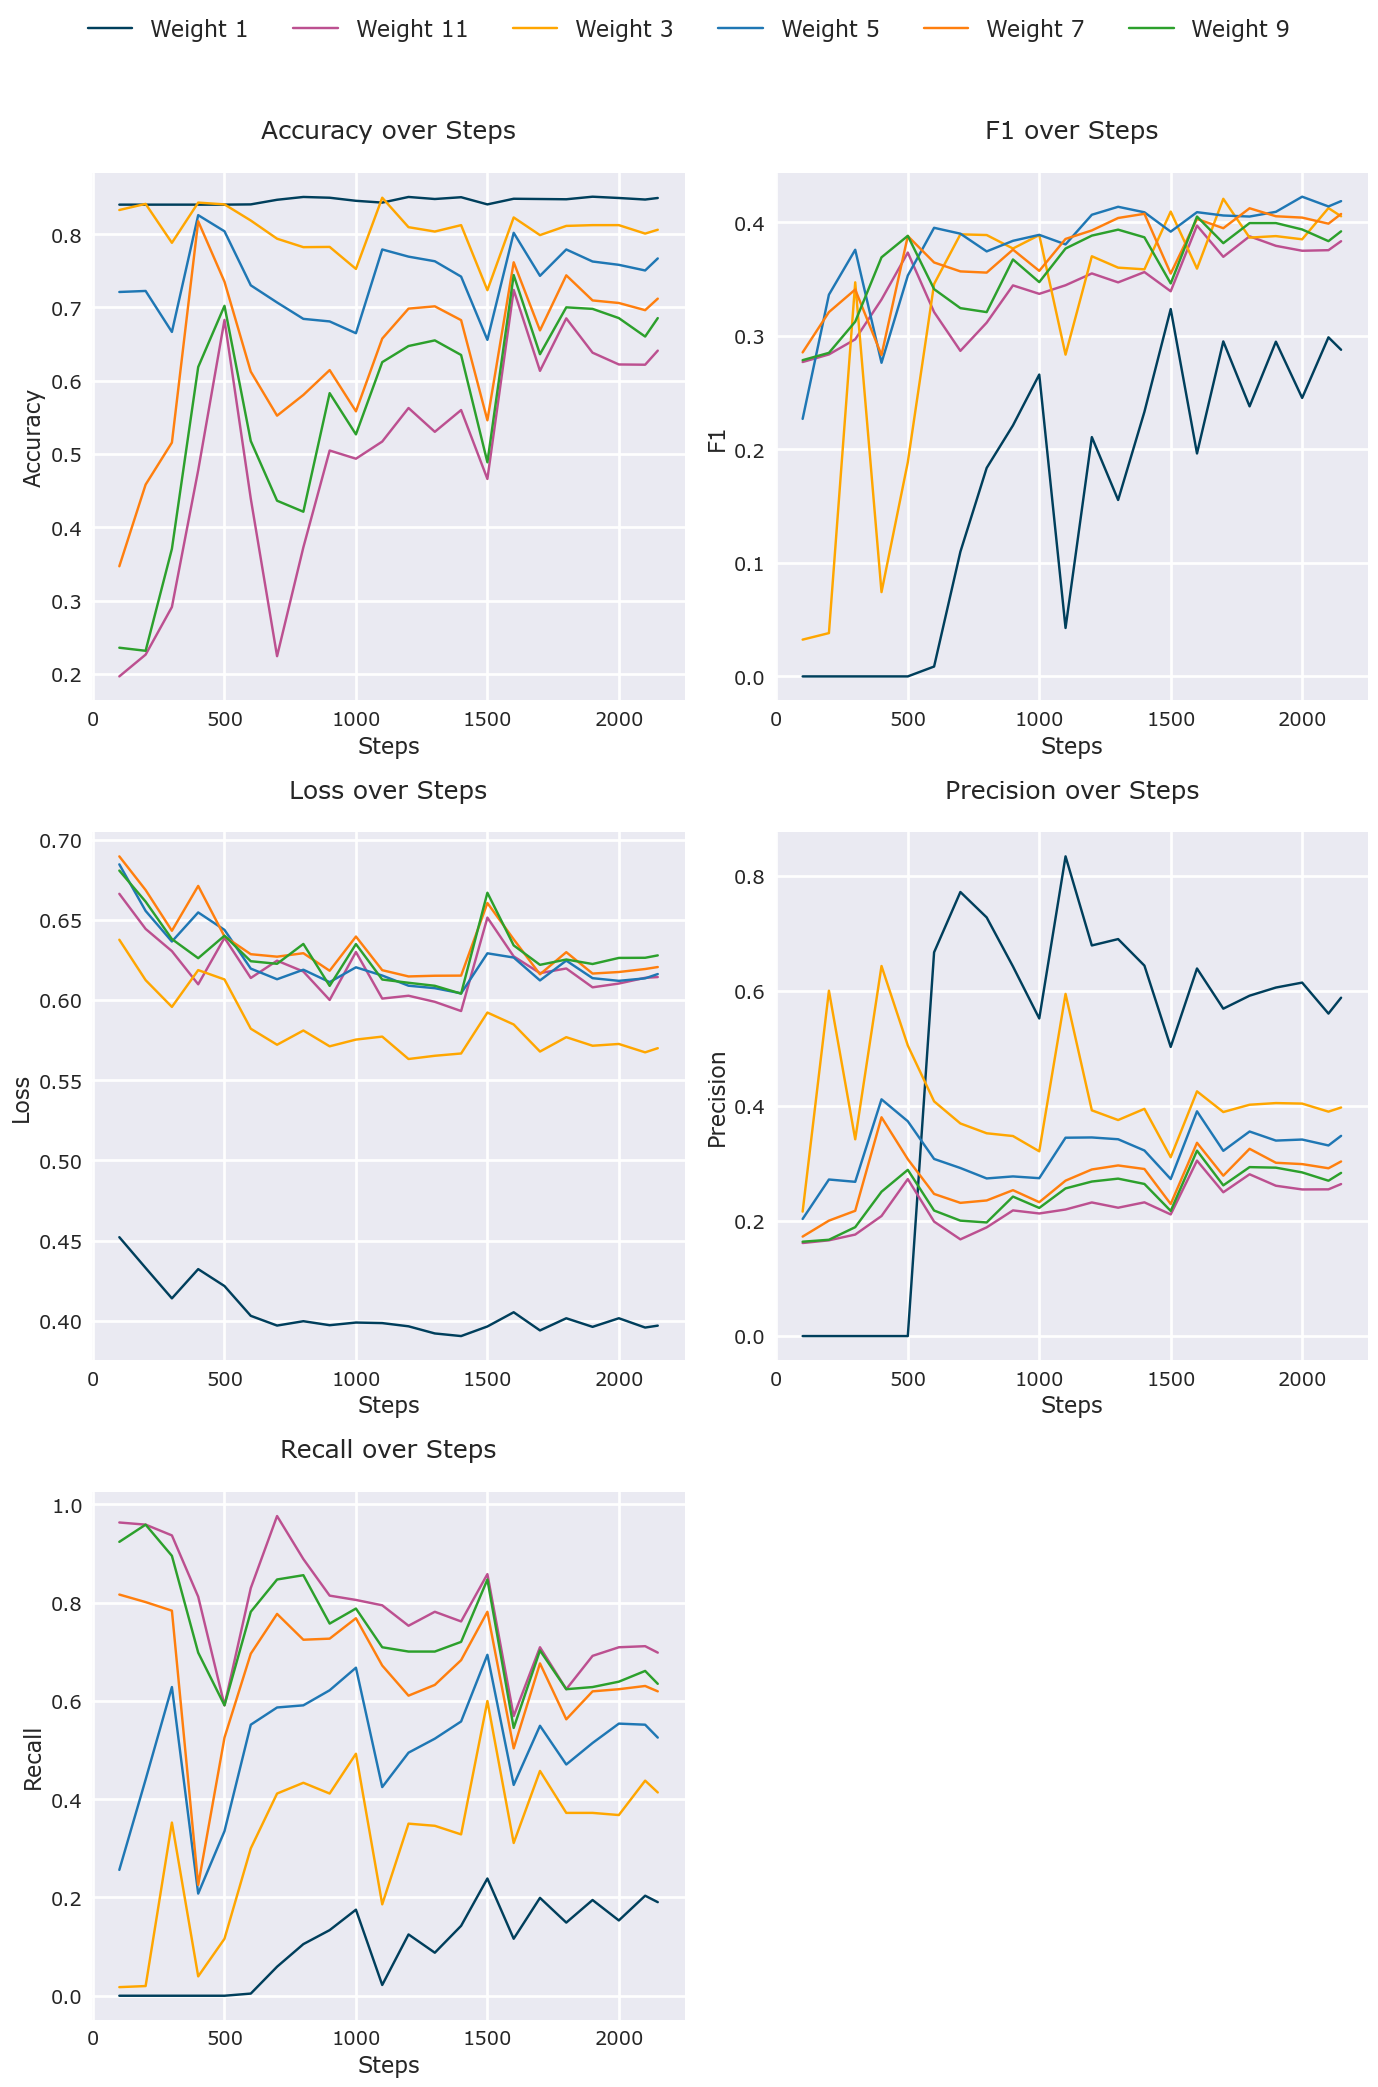

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the seaborn style
plt.style.use('seaborn')
# Set the font to "Verdana" and increase font size
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 14
colors = ['#003f5c', '#bc5090', '#ffa600', "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]

# Load the dataset
data_df = pd.read_csv('/Users/Magnus/Downloads/output_Final.csv')

# List of metrics
metrics = ["eval/accuracy", "eval/f1", "eval/loss", "eval/precision", "eval/recall"]

# Create line charts with 2 columns and square plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 20))
axes = axes.ravel()  # Flatten the axes array

legend_handles, legend_labels = [], []

for i, metric in enumerate(metrics):
    metric_data = data_df[data_df['Tag'] == metric]
    
    for color_idx, (run, group) in enumerate(metric_data.groupby('Run')):
        sorted_group = group.sort_values(by='Step')
        
        # Extract run number and rename the run
        run_number = int(run.split('_')[-1])
        run_name = f"Weight {run_number}"
        
        line, = axes[i].plot(sorted_group['Step'], sorted_group['Value'], color=colors[color_idx % len(colors)])
        
        # Gather legend info
        if i == 0:  # Only do this for the first metric to avoid duplicates
            legend_handles.append(line)
            legend_labels.append(run_name)
    
    # Set title, labels, and remove individual legends
    clean_metric = metric.replace("eval/", "")  # Remove "eval/" prefix
    axes[i].set_title(f"{clean_metric.capitalize()} over Steps", fontsize=18, pad=25)
    axes[i].set_xlabel("Steps", fontsize=16)
    axes[i].set_ylabel(clean_metric.capitalize(), fontsize=16)
    axes[i].grid(True, linestyle='-', linewidth=1.9, alpha=0.99, color='white')
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Remove the last unused subplot
axes[-1].axis('off')

# Create one unified legend for the figure at the top, but slightly lower than before
fig.legend(legend_handles, legend_labels, loc='upper center', ncol=len(legend_handles), bbox_to_anchor=(0.5, 1.05), frameon=False, fontsize=16)

plt.tight_layout()
plt.show()
